In [2]:
import numpy as np
import sympy as sp
from sympy.abc import x
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
ksi_list = []

In [128]:
np.int(2*500/1400*10)

C:\Users\ivan\AppData\Local\Temp\ipykernel_1640\423699721.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.int(2*500/1400*10)


7

In [136]:
np.arange(1,8)

array([1, 2, 3, 4, 5, 6, 7])

In [129]:
for m in np.arange(1,8):
    ksi = np.sqrt((2*3.14*500/1400)**2-(np.pi*m/10)**2)
    ksi_list.append(ksi)
ksi_list

[2.220745847514842,
 2.153049926783337,
 2.035225728799453,
 1.8577597958538692,
 1.600939431394257,
 1.2154631129216296,
 0.44079701307009955]

In [130]:
psi_z_list = []

In [131]:
k = 2*3.14*500/1400
print(k)

2.242857142857143


In [132]:
for i in np.arange(len(ksi_list)):
    psi_z = np.cos(5*np.sqrt(k**2-np.square(ksi_list[i])))
    psi_z_list.append(psi_z)
psi_z_list

[4.2800798335329624e-15,
 -1.0,
 1.5926598195281475e-15,
 1.0,
 3.061616997868383e-16,
 -1.0,
 -4.286263797015736e-16]

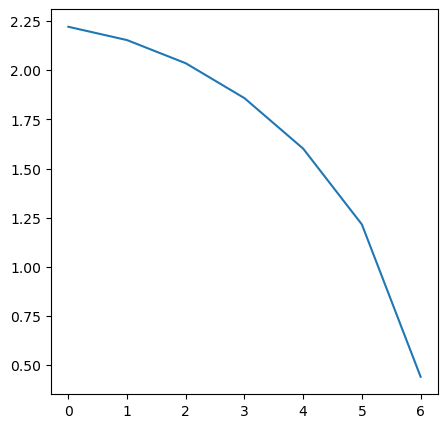

In [133]:
plt.figure(figsize=(5, 5))
plt.plot(np.arange(len(ksi_list)), ksi_list)
plt.show()

In [67]:
z = symbols('z')

In [83]:
sum_p_list = 0
for s in np.arange(len(ksi_list)):
    psi_m = sp.cos(z*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]/np.sqrt(ksi_list[s]*100)
    sum_p_list+=psi_m 
sum_p_list

2.87211906847698e-16*cos(5.57389342208349*z) - 0.0681511124956555*cos(5.60039070179735*z) + 1.11639204052859e-16*cos(5.64427641357444*z) + 0.0733677532805098*cos(5.70514930049241*z) + 2.41971050332446e-17*cos(5.78247290845422*z) - 0.0907045573662476*cos(5.87559779266134*z) - 6.45594132416852e-17*cos(5.98378625898924*z)

In [12]:
def func(params):
    sum_p_list = 0
    z1 = params
    for s in np.arange(len(ksi_list)):
        psi_m = np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.cos(ksi_list[s]*100)/np.sqrt(ksi_list[s]*100)
        sum_p_list+=psi_m 
        
    return sum_p_list

In [13]:
def sin_func(params):
    sum_p_list = 0
    z1 = params
    for s in np.arange(len(ksi_list)):
        psi_m = np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.sin(ksi_list[s]*100)/np.sqrt(ksi_list[s]*100)
        sum_p_list+=psi_m 
        
    return sum_p_list

In [52]:
def abs_func(params):
    sum_p_list = 0
    z1 = params
    for s in np.arange(len(ksi_list)):
        sin_m = np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.sin(ksi_list[s]*100)/np.sqrt(ksi_list[s]*100)
        cos_m = np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.cos(ksi_list[s]*100)/np.sqrt(ksi_list[s]*100)        
        sum_p_list+= sin_m**2+cos_m**2
        
    return sum_p_list

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


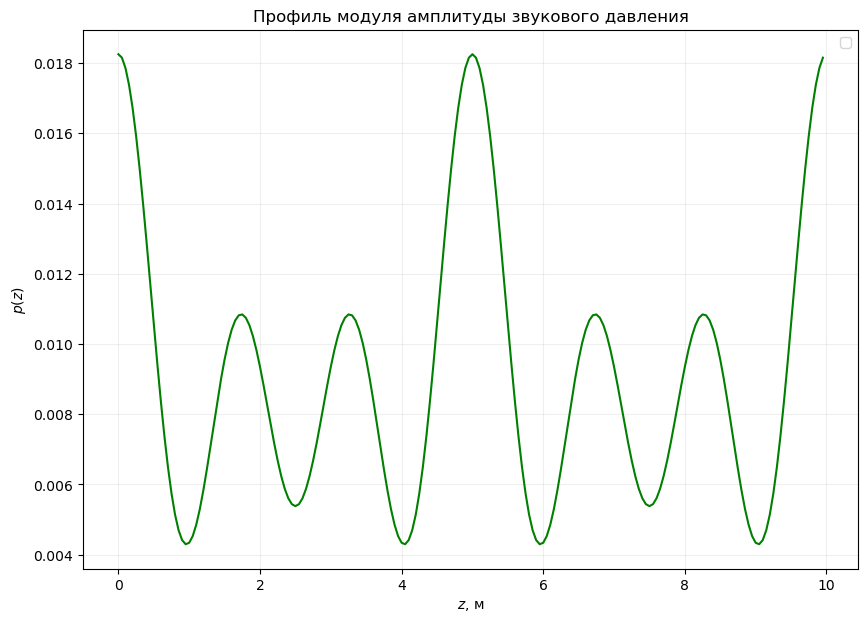

In [53]:
z1=np.arange(0, 10, 0.05)

plt.figure(figsize=(10, 7))
plt.plot(z1, abs_func(z1), c='g')
plt.title("Профиль модуля амплитуды звукового давления")
plt.grid(alpha=0.2)
plt.xlabel('$z$, м')
plt.ylabel('$p(z)$')
plt.legend()
plt.savefig('Module amplitude profile')
plt.show()

In [139]:
cos_list, sin_list = [], []
sum_p_list = []
z1 = np.arange(0, 10, 0.05)
for s in np.arange(len(ksi_list)):
    cos_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.cos(ksi_list[s]*100)/np.sqrt(ksi_list[s]*100))
    sin_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.sin(ksi_list[s]*100)/np.sqrt(ksi_list[s]*100)        )
    #sum_p_list.append(np.arctan(sum(sin_list[s])/sum(cos_list[s])))
    #sum_p_list+=np.arctan(sum(sin_list[s])/sum(cos_list[s]))
cos_table, sin_table = pd.DataFrame(cos_list), pd.DataFrame(sin_list)

cos_sum_list, sin_sum_list = [], []
for h in np.arange(cos_table.shape[1]):
    cos_sum_list.append(sum(cos_table[h]))
    sin_sum_list.append(sum(sin_table[h]))

arctang_list = []
for g in np.arange(len(cos_sum_list)):
    arctang_list.append(np.arctan(sin_sum_list[g]/cos_sum_list[g]))
arctang_list

[-1.5366532755522344,
 -1.5373832397046043,
 -1.5395841107814554,
 -1.5432892831608984,
 -1.5485559785682208,
 -1.5554677232137275,
 -1.5641380932812587,
 1.5668766060016097,
 1.5541993294231737,
 1.5391780527066812,
 1.521501209437466,
 1.5007711063385814,
 1.4764771838064492,
 1.4479585070778194,
 1.4143506666076553,
 1.3745100680438676,
 1.3269057757096334,
 1.2694664504797268,
 1.1993710062682206,
 1.1127881555360022,
 1.0046361647831399,
 0.868632431948202,
 0.6983565994344328,
 0.49060198778840464,
 0.2513365548616251,
 -0.0005645643319392773,
 -0.2401524508689,
 -0.4499439350866299,
 -0.6253913833098597,
 -0.7704441491036162,
 -0.8917755059859113,
 -0.9957540925179299,
 -1.0875529790364458,
 -1.1711583227485083,
 -1.249618672399411,
 -1.3252970615698338,
 -1.4000647267123316,
 -1.475432267108208,
 -1.5526272571537392,
 1.5089650914001929,
 1.4254348210149606,
 1.3379359484463553,
 1.246367156709403,
 1.1510172550458015,
 1.0525957564283377,
 0.9522153542629659,
 0.85130864304818

In [94]:
sum(cos_table[7])

-0.15268262403781835

In [93]:
cos_table[8]

0    2.364085e-16
1   -6.564025e-02
2    6.534502e-17
3   -2.633412e-02
4    2.484937e-18
5   -5.475804e-02
6   -4.002013e-18
Name: 8, dtype: float64

In [97]:
cos_sum_list, sin_sum_list = [], []
for h in np.arange(cos_table.shape[1]):
    cos_sum_list.append(sum(cos_table[h]))
    sin_sum_list.append(sum(sin_table[h]))
len(cos_sum_list), len(sin_sum_list)

(200, 200)

In [85]:
import pandas as pd
pd.DataFrame(cos_list)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,2.382875e-16,2.382581e-16,2.381699e-16,2.380229e-16,2.378173e-16,2.375529e-16,2.372299e-16,2.368484e-16,2.364085e-16,2.359102e-16,...,-2.353538e-16,-2.359102e-16,-2.364085e-16,-2.368484e-16,-2.372299e-16,-2.375529e-16,-2.378173e-16,-2.380229e-16,-2.381699e-16,-2.382581e-16
1,-6.776935e-02,-6.773591e-02,-6.763562e-02,-6.746859e-02,-6.723497e-02,-6.693499e-02,-6.656897e-02,-6.613724e-02,-6.564025e-02,-6.507848e-02,...,-6.445248e-02,-6.507848e-02,-6.564025e-02,-6.613724e-02,-6.656897e-02,-6.693499e-02,-6.723497e-02,-6.746859e-02,-6.763562e-02,-6.773591e-02
2,7.028035e-17,7.020233e-17,6.996845e-17,6.957921e-17,6.903550e-17,6.833850e-17,6.748978e-17,6.649121e-17,6.534502e-17,6.405374e-17,...,-6.262025e-17,-6.405374e-17,-6.534502e-17,-6.649121e-17,-6.748978e-17,-6.833850e-17,-6.903550e-17,-6.957921e-17,-6.996845e-17,-7.020233e-17
3,-3.005126e-02,-2.999196e-02,-2.981430e-02,-2.951897e-02,-2.910715e-02,-2.858045e-02,-2.794096e-02,-2.719120e-02,-2.633412e-02,-2.537312e-02,...,-2.431198e-02,-2.537312e-02,-2.633412e-02,-2.719120e-02,-2.794096e-02,-2.858045e-02,-2.910715e-02,-2.951897e-02,-2.981430e-02,-2.999196e-02
4,3.071551e-18,3.062083e-18,3.033735e-18,2.986684e-18,2.921219e-18,2.837743e-18,2.736772e-18,2.618928e-18,2.484937e-18,2.335626e-18,...,-2.171915e-18,-2.335626e-18,-2.484937e-18,-2.618928e-18,-2.736772e-18,-2.837743e-18,-2.921219e-18,-2.986684e-18,-3.033735e-18,-3.062083e-18
5,-7.511714e-02,-7.478377e-02,-7.378661e-02,-7.213452e-02,-6.984215e-02,-6.692986e-02,-6.342350e-02,-5.935419e-02,-5.475804e-02,-4.967586e-02,...,-4.415275e-02,-4.967586e-02,-5.475804e-02,-5.935419e-02,-6.342350e-02,-6.692986e-02,-6.984215e-02,-7.213452e-02,-7.378661e-02,-7.478377e-02
6,-6.278416e-18,-6.240501e-18,-6.127212e-18,-5.939918e-18,-5.680881e-18,-5.353230e-18,-4.960922e-18,-4.508696e-18,-4.002013e-18,-3.446994e-18,...,2.850341e-18,3.446994e-18,4.002013e-18,4.508696e-18,4.960922e-18,5.353230e-18,5.680881e-18,5.939918e-18,6.127212e-18,6.240501e-18


In [80]:
cos_list[0][33]

2.0698400790720512e-16

In [10]:
import numpy as np
import sympy as sp
import pandas as pd

def faze_f_func(h, r, mu, c):
    
    modes = np.int(2*mu/c*h)
    ksi_list = []
    for m in np.arange(1, modes+1):
        ksi = np.sqrt((2*np.pi*mu/c)**2-(np.pi*m/h)**2)
        ksi_list.append(ksi)
    
    k = 2*np.pi*mu/c
    psi_z_list = []
    for i in np.arange(len(ksi_list)):
        psi_z = np.cos(0.5*h*np.sqrt(k**2-np.square(ksi_list[i])))
        psi_z_list.append(psi_z)

    cos_list, sin_list = [], []
    z1 = np.arange(0, h, 0.05)
    
    for s in np.arange(len(ksi_list)):
        cos_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.cos(ksi_list[s]*r)/np.sqrt(ksi_list[s]*r))
        sin_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.sin(ksi_list[s]*r)/np.sqrt(ksi_list[s]*r))
    cos_table, sin_table = pd.DataFrame(cos_list), pd.DataFrame(sin_list)

    cos_sum_list, sin_sum_list = [], []
    for h in np.arange(cos_table.shape[1]):
        cos_sum_list.append(sum(cos_table[h]))
        sin_sum_list.append(sum(sin_table[h]))

    arctang_list = []
    for g in np.arange(len(cos_sum_list)):
        arctang_list.append(np.arctan(sin_sum_list[g]/cos_sum_list[g]))
    return arctang_list
    

C:\Users\ivan\AppData\Local\Temp\ipykernel_15904\3170239831.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modes = np.int(2*mu/c*h)


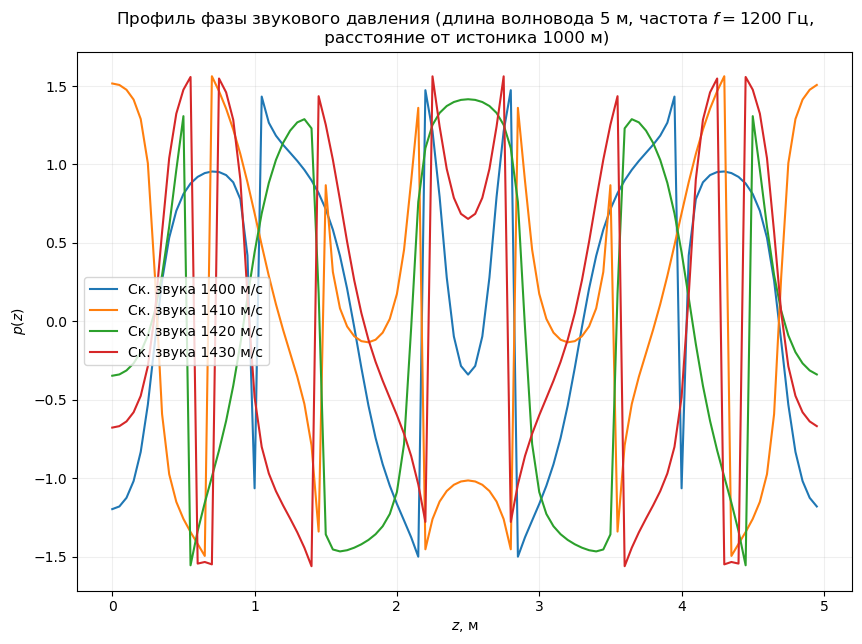

In [52]:
plt.figure(figsize=(10, 7))
z=5
f=1200
r=1000
for j in np.arange(1400, 1440, 10):
    plt.plot(np.arange(len(faze_f_func(z, r, f, j)))/20, faze_f_func(z, r, f, j), label=f'Ск. звука {j} м/c')
plt.title(f"Профиль фазы звукового давления (длина волновода {z} м, частота $f={f}$ Гц,\n расстояние от истоника {r} м)")
plt.grid(alpha=0.2)
plt.xlabel('$z$, м')
plt.ylabel('$p(z)$')
plt.legend()
plt.savefig('Phase amplitude profile')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


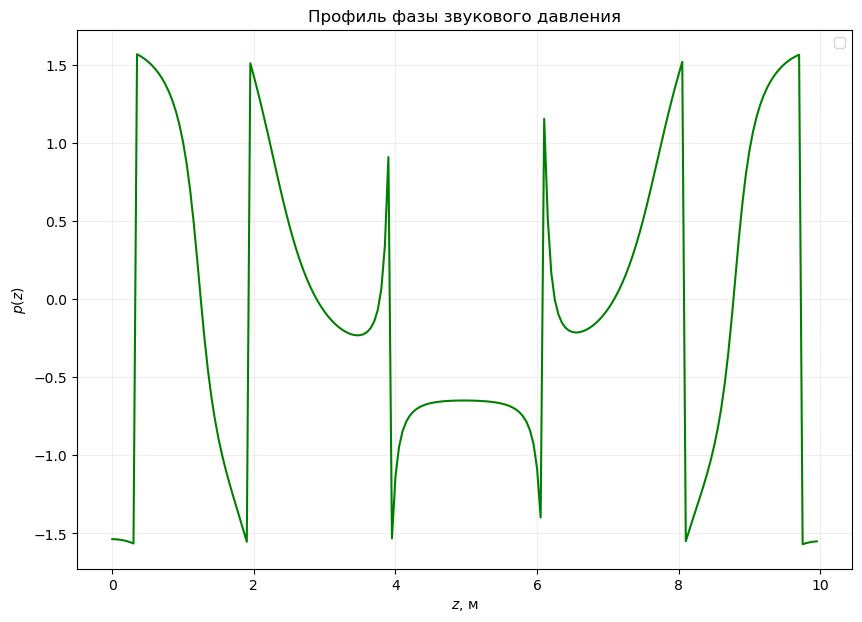

In [140]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(arctang_list))/20, arctang_list, c='g')
plt.title("Профиль фазы звукового давления")
plt.grid(alpha=0.2)
plt.xlabel('$z$, м')
plt.ylabel('$p(z)$')
plt.legend()
plt.savefig('Phase amplitude profile')
plt.show()


In [15]:
import numpy as np
import sympy as sp
import pandas as pd

def abs_f_func(h, r, mu, c):
    
    modes = np.int(2*mu/c*h)
    ksi_list = []
    for m in np.arange(1, modes+1):
        ksi = np.sqrt((2*np.pi*mu/c)**2-(np.pi*m/h)**2)
        ksi_list.append(ksi)
    
    k = 2*np.pi*mu/c
    psi_z_list = []
    for i in np.arange(len(ksi_list)):
        psi_z = np.cos(0.5*h*np.sqrt(k**2-np.square(ksi_list[i])))
        psi_z_list.append(psi_z)

    cos_list, sin_list = [], []
    z1 = np.arange(0, h, 0.05)
    
    for s in np.arange(len(ksi_list)):
        cos_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.cos(ksi_list[s]*r)/np.sqrt(ksi_list[s]*r))
        sin_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.sin(ksi_list[s]*r)/np.sqrt(ksi_list[s]*r))
    cos_table, sin_table = pd.DataFrame(cos_list), pd.DataFrame(sin_list)

    cos_sum_list, sin_sum_list = [], []
    for h in np.arange(cos_table.shape[1]):
        cos_sum_list.append(sum(cos_table[h]))
        sin_sum_list.append(sum(sin_table[h]))

    abs_list = []
    for g in np.arange(len(cos_sum_list)):
        abs_list.append(sin_sum_list[g]**2+cos_sum_list[g]**2)
    return abs_list
    

C:\Users\ivan\AppData\Local\Temp\ipykernel_15904\129172430.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modes = np.int(2*mu/c*h)
C:\Users\ivan\AppData\Local\Temp\ipykernel_15904\129172430.py:23: RuntimeWarning: divide by zero encountered in divide
  cos_list.append(np.cos(z1*np.sqrt(k**2-np.square(ksi_list[s])))*psi_z_list[s]*np.cos(ksi_list[s]*r)/np.sqrt(ksi_list[s]*r))
C:\Users\ivan\AppData\Local\Temp\ipykernel_15904\129172430.py:24: RuntimeWarning: invalid value encountered in divide
  sin_list.append(np.cos(z1*np.sqrt(k**2-np.square(ks

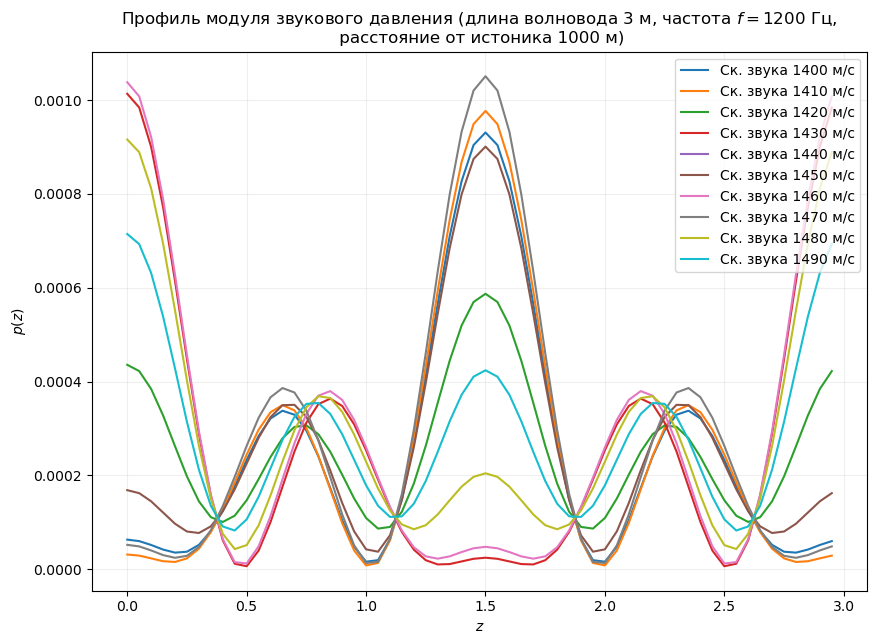

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(10, 7))
z=3
f=1200
r=1000
for j in np.arange(1400, 1500, 10):
    plt.plot(np.arange(len(abs_f_func(z, r, f, j)))/20, abs_f_func(z, r, f, j), label=f'Ск. звука {j} м/c')
#plt.plot(np.arange(len(abs_f_func(10, 100, 500, 1450)))/20, abs_f_func(10, 100, 500, 1450), label=f'Расстояние 100 м', c='g')
plt.title(f"Профиль модуля звукового давления (длина волновода {z} м, частота $f={f}$ Гц,\n расстояние от истоника {r} м)")
plt.grid(alpha=0.2)
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.legend()
plt.show()
plt.savefig('Sound pressure phase profile')